## STAT3612: Statistical Machine Learning
### Assignment 1: Python basics and logistic regression
### DUE: Feb 16, 2025, Sunday, 11:59 PM

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Tuple
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
import umap

sns.set_style("darkgrid")

#### Part 1: Conceptual Questions

**Q1**

a) FALSE, The target variable is numeric variable which could be handled better with Regression\
b) TRUE\
c) FALSE, even the model has lower bias, if it has high variance it is overfitted. Hence, not always guaranteed\
d) TRUE

**Q2**

Intercept: 1.0
Slope: 2.0
Regression Equation: Y = 1.0 + 2.0X


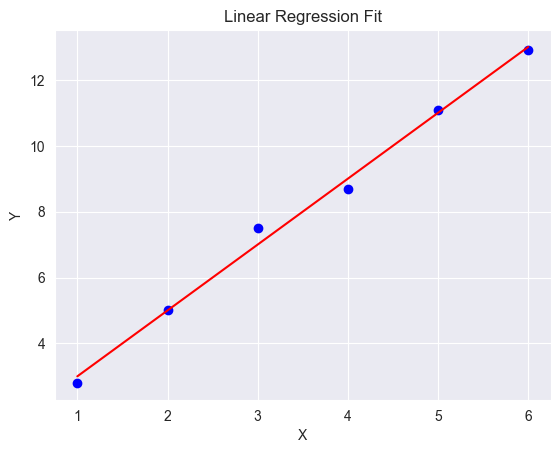

In [2]:
# Q2 (a)
x = np.array([1.0, 2.0, 3.0, 4.0, 5.0, 6.0])
y = np.array([2.8, 5.0, 7.5, 8.7, 11.1, 12.9])

x_mean = np.mean(x)
y_mean = np.mean(y)

b1 = np.sum((x - x_mean)*(y - y_mean)) / np.sum((x - x_mean) ** 2)
b0 = y_mean - b1 * x_mean

print(f"Intercept: {b0}")
print(f"Slope: {b1}")

print(f"Regression Equation: Y = {b0} + {b1}X")

x_line = np.linspace(min(x),max(x),50)
y_line = b0 + b1*x_line

plt.scatter(x, y, color='blue')
plt.plot(x_line, y_line, color='red')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression Fit')
plt.show()

In [3]:
# Q2 (b)
coefficients = np.polyfit(x, y, 5)

y_pred = np.polyval(coefficients, x)

training_error = np.sum((y - y_pred) ** 2)

print("Fitted 5th-order polynomial coefficients:")
print(coefficients)
print(f"Training Error: {training_error}")

Fitted 5th-order polynomial coefficients:
[ -0.07         1.22083333  -7.925       23.47916667 -28.905
  15.        ]
Training Error: 1.992224828785878e-24


#### Part 2: Python and NumPy basics

In [4]:
# Q3 (a)  
file = "/Users/havinchung/Desktop/STAT3612/assign1/Employee-Attrition-Classification.csv"

df = pd.read_csv(file, usecols=["Age", "Years at Company",  "Monthly Income", 
             "Distance from Home", "Company Tenure", "Number of Promotions",
             "Number of Dependents", "Attrition"])
df["Attrition"] = df["Attrition"].map({"Stayed": 1, "Left": 0})
df.head()

,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure,Attrition
0,31,19,5390,2,22,0,89,1
1,59,4,5534,3,21,3,21,1
2,24,10,8159,0,11,3,74,1
3,36,7,3989,1,27,2,50,1
4,56,41,4821,0,71,0,68,1


In [5]:
# Q3 (b)  
attr_names = ["Age", "Years at Company",  "Monthly Income", 
             "Distance from Home", "Company Tenure", "Number of Promotions",
             "Number of Dependents"]
df[attr_names].describe()

,Age,Years at Company,Monthly Income,Distance from Home,Company Tenure,Number of Promotions,Number of Dependents
count,59598.000000,59598.000000,59598.000000,59598.000000,59598.000000,59598.000000,59598.000000
mean,38.565875,15.753901,7302.397983,50.007651,55.758415,0.832578,1.648075
std,12.079673,11.245981,2151.457423,28.466459,25.411090,0.994991,1.555689
min,18.000000,1.000000,1316.000000,1.000000,2.000000,0.000000,0.000000
25%,28.000000,7.000000,5658.000000,25.000000,36.000000,0.000000,0.000000
50%,39.000000,13.000000,7354.000000,50.000000,56.000000,1.000000,1.000000
75%,49.000000,23.000000,8880.000000,75.000000,76.000000,2.000000,3.000000
max,59.000000,51.000000,16149.000000,99.000000,128.000000,4.000000,6.000000


In [6]:
# Q3 (c)  
attr_names = ["Age", "Years at Company",  "Monthly Income", 
             "Distance from Home", "Company Tenure", "Number of Promotions",
             "Number of Dependents"]
df_corr = df[attr_names].corr(method='pearson')
df_corr

,Age,Years at Company,Monthly Income,Distance from Home,Company Tenure,Number of Promotions,Number of Dependents
Age,1.000000,0.539806,-0.001989,-0.007063,0.237048,0.000167,0.002927
Years at Company,0.539806,1.000000,-0.005288,-0.006888,0.442180,-0.000229,0.003973
Monthly Income,-0.001989,-0.005288,1.000000,-0.002528,-0.005397,0.006418,0.002582
Distance from Home,-0.007063,-0.006888,-0.002528,1.000000,-0.005595,-0.007882,0.000659
Company Tenure,0.237048,0.442180,-0.005397,-0.005595,1.000000,0.003903,0.001600
Number of Promotions,0.000167,-0.000229,0.006418,-0.007882,0.003903,1.000000,-0.000558
Number of Dependents,0.002927,0.003973,0.002582,0.000659,0.001600,-0.000558,1.000000


In [7]:
# Q3 (d)  
attr_names = ["Age", "Years at Company",  "Monthly Income", 
             "Distance from Home", "Company Tenure", "Number of Promotions",
             "Number of Dependents"]

data = df[attr_names]
df_standardized = (data - data.mean()) / data.std()

df_standardized.head()

,Age,Years at Company,Monthly Income,Distance from Home,Company Tenure,Number of Promotions,Number of Dependents
0,-0.626331,0.288645,-0.888885,-0.983883,1.308153,1.173299,-1.059386
1,1.691612,-1.045165,-0.821954,-1.019012,-1.367844,2.178333,0.869020
2,-1.205817,-0.511641,0.398150,-1.370302,0.717859,-0.836770,0.869020
3,-0.212413,-0.778403,-1.540071,-0.808237,-0.226610,0.168265,0.226218
4,1.443261,2.244900,-1.153357,0.737442,0.481742,-0.836770,-1.059386


In [8]:
# Q3 (e)
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

train_mean = df_train.mean()
train_std = df_train.std()

df_train_stand = (df_train - train_mean) / train_std
df_test_stand = (df_test - train_mean) / train_std

display(df_train_stand.head())
display(df_test_stand.head())

,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure,Attrition
10250,1.694967,-0.333756,-1.092264,0.166245,0.459382,2.152598,-0.620400,0.952138
42948,0.040398,-0.067262,-1.446593,0.166245,0.881128,-0.418430,-0.462655,0.952138
57139,0.619497,0.998714,1.874891,-0.839112,-1.087020,1.509841,1.942952,-1.050246
25623,-1.283257,-0.156093,-0.618430,-0.839112,-0.032655,0.224327,1.430281,-1.050246
20424,-0.207788,-0.422587,-0.847210,0.166245,1.443457,-1.061187,0.286632,0.952138


,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure,Attrition
47848,-0.786887,-0.511418,-1.417298,-0.839112,1.689475,-1.061187,-0.147166,0.952138
15550,-1.696900,-1.133237,0.800745,2.176958,0.670255,0.867084,-0.226038,-1.050246
4448,-0.704158,-0.600249,0.604516,1.171602,0.986565,1.509841,0.247196,-1.050246
52577,0.619497,-1.222069,-1.041114,0.166245,-0.419255,-1.061187,-0.659836,-1.050246
6072,-0.125059,0.110401,1.268068,-0.839112,-0.454401,-0.418430,-0.541527,-1.050246


We should calculate the mean and std only rely on training data, as testing data is considered as not known during training.

**Why Shouldn't We Use Results from Q3(d) Directly?**\
If we standardize first and split the data it influences the test data itself. Where we should not have access to the test data.

#### Part 2: Data visualization

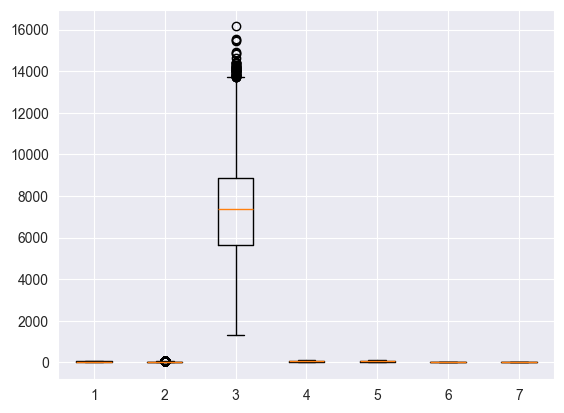

In [9]:
# Q4 (a)  
plt.boxplot(data)
plt.show()

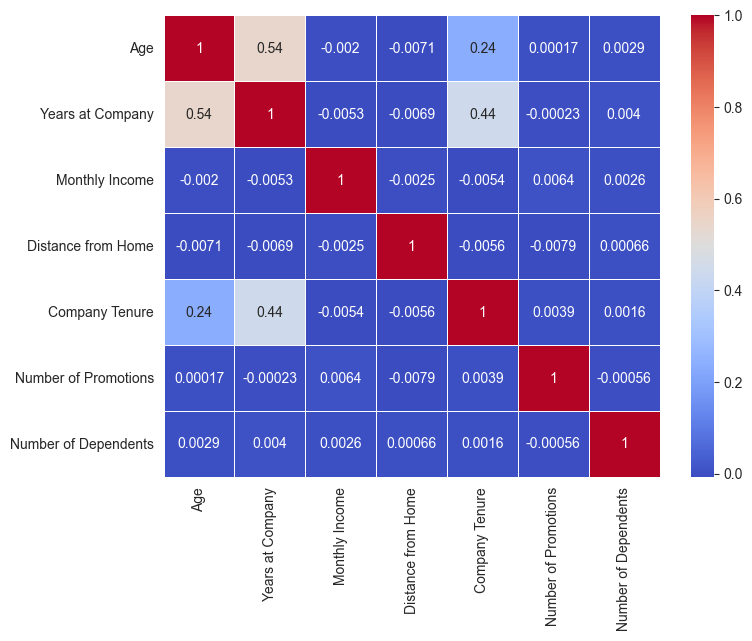

In [10]:
# Q4 (b)
plt.figure(figsize=(8,6))
sns.heatmap(df_corr,annot=True, cmap='coolwarm', linewidths=0.5)

plt.show()

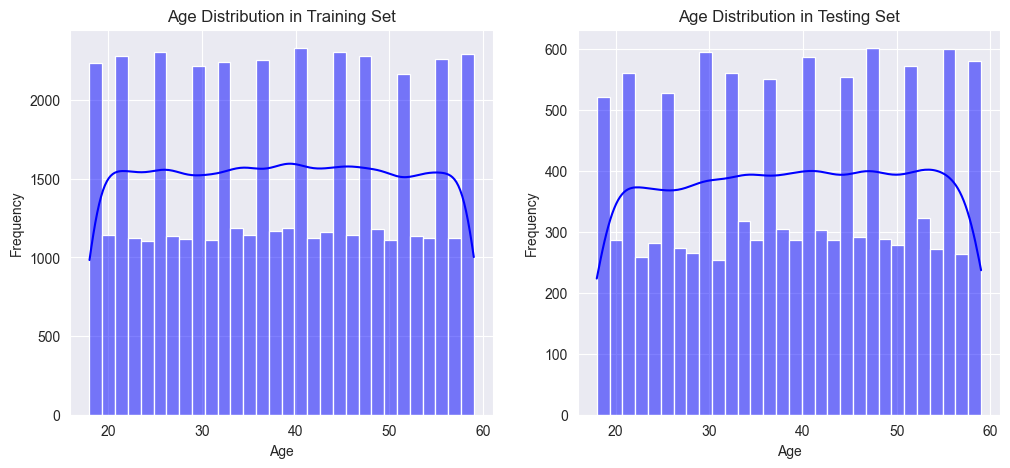

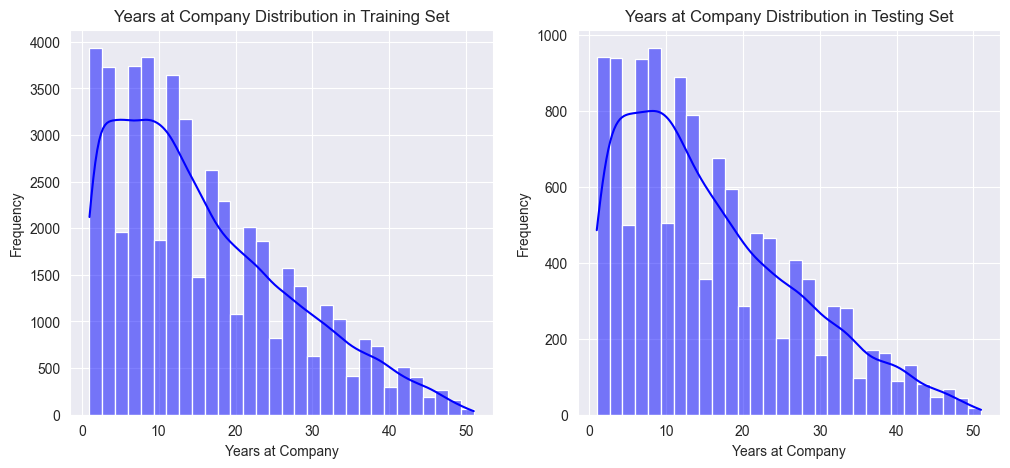

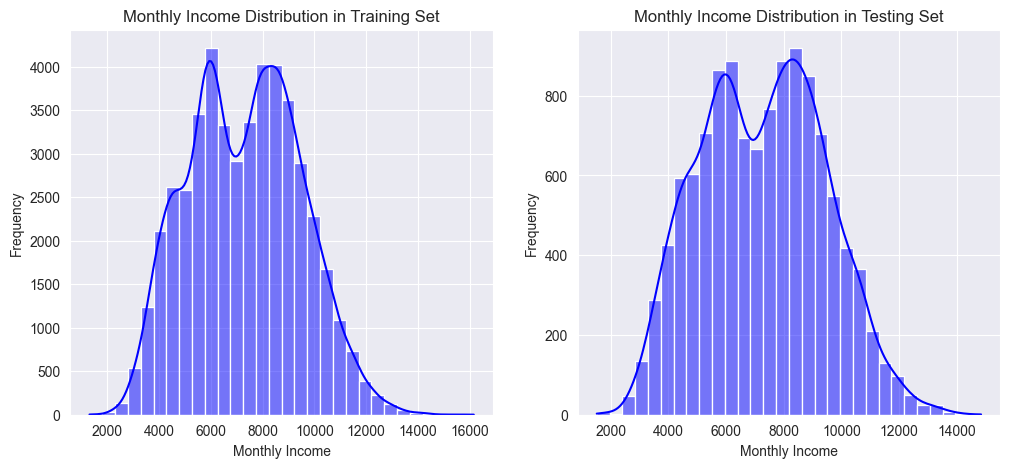

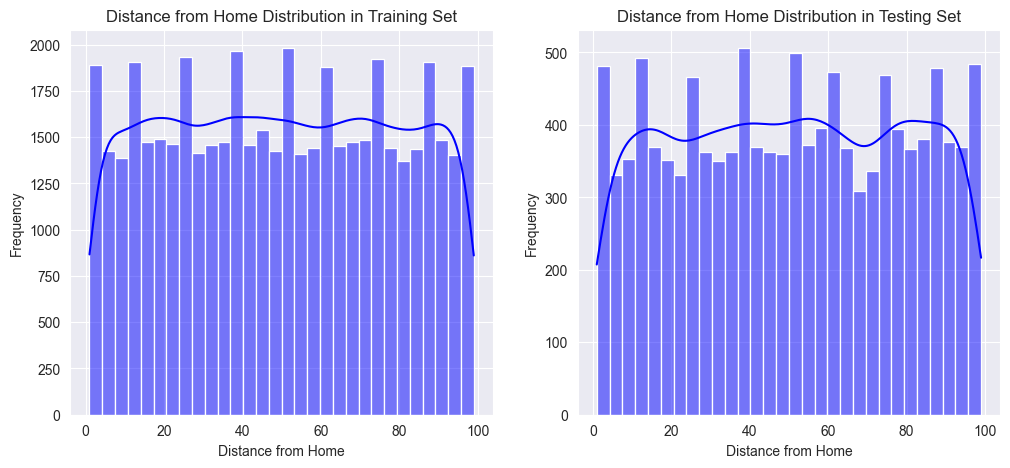

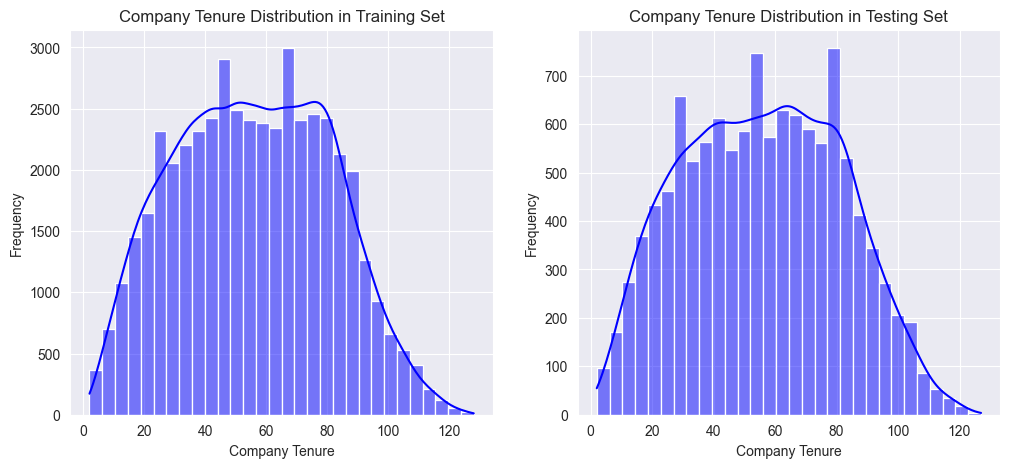

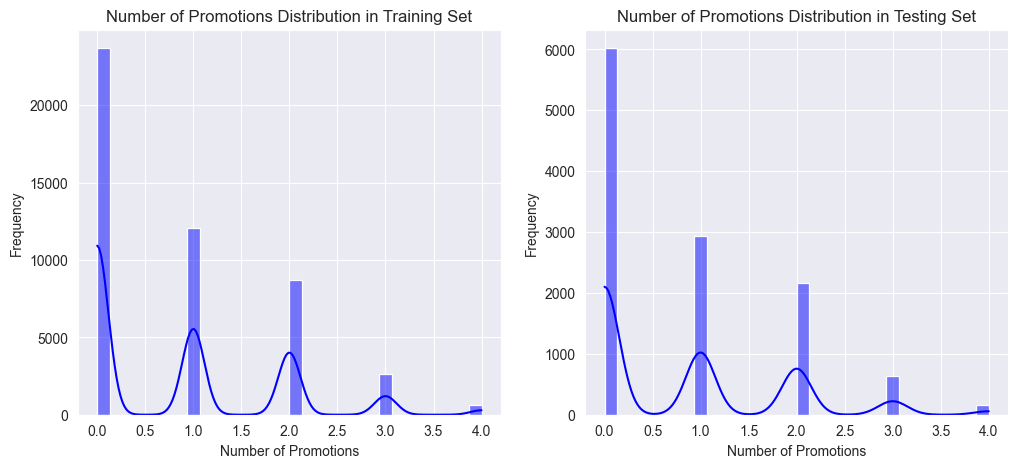

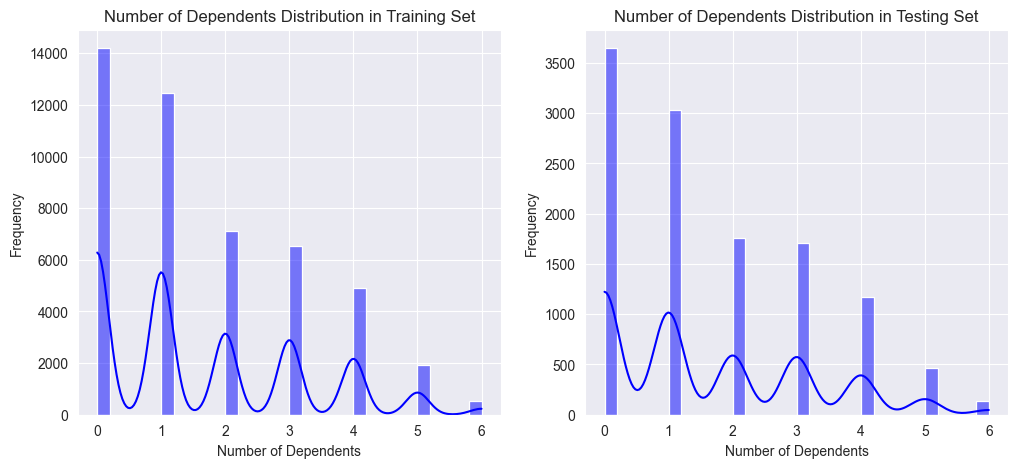

In [11]:
# Q4 (c)
for column in attr_names:
    plt.figure(figsize = (12,5))

    plt.subplot(1,2,1)
    sns.histplot(df_train[column], kde = True, color = 'Blue', bins = 30)
    plt.title(f'{column} Distribution in Training Set')
    plt.xlabel(column)
    plt.ylabel("Frequency")

    plt.subplot(1,2,2)
    sns.histplot(df_test[column], kde = True, color = 'Blue', bins = 30)
    plt.title(f'{column} Distribution in Testing Set')
    plt.xlabel(column)
    plt.ylabel("Frequency")

    plt.show()

#### Part 3: Logistic regression

In [12]:
# Q5 (a)

train_columns = ["Age", "Years at Company",  "Monthly Income", 
             "Distance from Home", "Company Tenure", "Number of Promotions",
             "Number of Dependents"]
test_columns = ["Attrition"]

x_train = df_train_stand[train_columns]
x_test = df_test_stand[train_columns]

y_train = df_train[test_columns].values.ravel()
y_test = df_test[test_columns].values.ravel()

log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

coefficients = pd.DataFrame(log_reg.coef_.flatten(), index = train_columns, columns = ['Coefficients'])

coefficients

,Coefficients
Age,0.034427
Years at Company,0.117958
Monthly Income,0.018157
Distance from Home,-0.190634
Company Tenure,0.000632
Number of Promotions,0.169948
Number of Dependents,0.168085


 Q5 (b)
 
The logistic regression model suggests that "Number of Promotions" (0.1699) and "Number of Dependents" (0.1681) have the strongest positive influence on retention, indicating employees with more promotions and dependents are less likely to leave. "Years at Company" (0.1179) also positively impacts retention, aligning with the idea that long-term employees are more stable. "Distance from Home" (-0.1906) has the only negative coefficient, meaning employees with longer commutes are more likely to leave, which makes sense. "Age" (0.0344), "Monthly Income" (0.0181), and "Company Tenure" (0.0006) have minimal effects, suggesting salary and tenure alone are not major retention factors. Overall, the results align with workplace trends, though further analysis could explore interactions between variables.

In [13]:
# Q5 (c)
y_train_pred = log_reg.predict(x_train)
y_test_pred = log_reg.predict(x_test)

train_precision, train_recall, train_f1, train_support = precision_recall_fscore_support(y_train, y_train_pred, average="macro")
test_precision, test_recall, test_f1, train_support = precision_recall_fscore_support(y_test, y_test_pred, average="macro")

df_report = pd.DataFrame({
    "Set": ["Training", "Testing"],
    "Precision": [train_precision, test_precision],
    "Recall": [train_recall, test_recall],
    "F1-score": [train_f1, test_f1]
})

df_report

,Set,Precision,Recall,F1-score
0,Training,0.563779,0.561509,0.559591
1,Testing,0.559479,0.557525,0.555772


In [14]:
# Q5 (d)
# Add new attributes
df_new = pd.read_csv(file, usecols=["Age", "Years at Company",  "Monthly Income", 
                                    "Work-Life Balance", "Distance from Home", 
                                    "Company Tenure", "Number of Promotions", 
                                    "Marital Status", "Number of Dependents", "Attrition"])

categorical_columns = df_new.select_dtypes(include=['object']).columns

# Check the unique values of categorical attributes
for col in categorical_columns:
    print(col)
    print(df_new[col].unique())

df_new["Attrition"] = df_new["Attrition"].map({"Stayed": 1, "Left": 0})
df_new["Work-Life Balance"] = df_new["Work-Life Balance"].map({"Excellent": 3, "Good": 2, "Fair": 1, "Poor": 0})
df_new["Marital Status"] = df_new["Marital Status"].map({"Married": 1, "Divorced": 0.5, "Single": 0})

# New interactive attribute
df_new["Family Responsibility"] = (df_new["Marital Status"] + df_new["Number of Dependents"])

df_new.head()

Work-Life Balance
['Excellent' 'Poor' 'Good' 'Fair']
Marital Status
['Married' 'Divorced' 'Single']
Attrition
['Stayed' 'Left']


,Age,Years at Company,Monthly Income,Work-Life Balance,Number of Promotions,Distance from Home,Marital Status,Number of Dependents,Company Tenure,Attrition,Family Responsibility
0,31,19,5390,3,2,22,1.0,0,89,1,1.0
1,59,4,5534,0,3,21,0.5,3,21,1,3.5
2,24,10,8159,2,0,11,1.0,3,74,1,4.0
3,36,7,3989,2,1,27,0.0,2,50,1,2.0
4,56,41,4821,1,0,71,0.5,0,68,1,0.5


In [15]:
# Train and test split & Standardization
df_new_train, df_new_test = train_test_split(df_new, test_size=0.2, random_state=42)

new_train_mean = df_new_train.mean()
new_train_std = df_new_train.std()

df_new_train_stand = (df_new_train - new_train_mean) / new_train_std
df_new_test_stand = (df_new_test - new_train_mean) / new_train_std

display(df_new_train_stand.head())
display(df_new_test_stand.head())

,Age,Years at Company,Monthly Income,Work-Life Balance,Number of Promotions,Distance from Home,Marital Status,Number of Dependents,Company Tenure,Attrition,Family Responsibility
10250,1.694967,-0.333756,-1.092264,0.427421,0.166245,0.459382,0.932046,2.152598,-0.620400,0.952138,2.327372
42948,0.040398,-0.067262,-1.446593,-0.639968,0.166245,0.881128,0.932046,-0.418430,-0.462655,0.952138,-0.139923
57139,0.619497,0.998714,1.874891,0.427421,-0.839112,-1.087020,-0.166683,1.509841,1.942952,-1.050246,1.402136
25623,-1.283257,-0.156093,-0.618430,-0.639968,-0.839112,-0.032655,0.932046,0.224327,1.430281,-1.050246,0.476901
20424,-0.207788,-0.422587,-0.847210,-0.639968,0.166245,1.443457,0.932046,-1.061187,0.286632,0.952138,-0.756747


,Age,Years at Company,Monthly Income,Work-Life Balance,Number of Promotions,Distance from Home,Marital Status,Number of Dependents,Company Tenure,Attrition,Family Responsibility
47848,-0.786887,-0.511418,-1.417298,-0.639968,-0.839112,1.689475,0.932046,-1.061187,-0.147166,0.952138,-0.756747
15550,-1.696900,-1.133237,0.800745,0.427421,2.176958,0.670255,-1.265412,0.867084,-0.226038,-1.050246,0.476901
4448,-0.704158,-0.600249,0.604516,-1.707358,1.171602,0.986565,0.932046,1.509841,0.247196,-1.050246,1.710548
52577,0.619497,-1.222069,-1.041114,-0.639968,0.166245,-0.419255,0.932046,-1.061187,-0.659836,-1.050246,-0.756747
6072,-0.125059,0.110401,1.268068,-0.639968,-0.839112,-0.454401,0.932046,-0.418430,-0.541527,-1.050246,-0.139923


In [16]:
train_columns = ["Age", "Years at Company",  "Monthly Income", "Work-Life Balance",
             "Distance from Home", "Company Tenure", "Number of Promotions",
             "Family Responsibility"]
test_columns = ["Attrition"]

x_train = df_new_train_stand[train_columns]
x_test = df_new_test_stand[train_columns]

y_train = df_new_train[test_columns].values.ravel()
y_test = df_new_test[test_columns].values.ravel()

log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

coefficients = pd.DataFrame(log_reg.coef_.flatten(), index = train_columns, columns = ['Coefficients'])

coefficients

,Coefficients
Age,0.033698
Years at Company,0.123009
Monthly Income,0.016407
Work-Life Balance,0.397886
Distance from Home,-0.204323
Company Tenure,-0.000367
Number of Promotions,0.182116
Family Responsibility,0.337101


In [17]:
y_train_pred = log_reg.predict(x_train)
y_test_pred = log_reg.predict(x_test)

train_precision, train_recall, train_f1, train_support = precision_recall_fscore_support(y_train, y_train_pred, average="macro")
test_precision, test_recall, test_f1, train_support = precision_recall_fscore_support(y_test, y_test_pred, average="macro")

df_new_report = pd.DataFrame({
    "Set": ["Training", "Testing"],
    "Precision": [train_precision, test_precision],
    "Recall": [train_recall, test_recall],
    "F1-score": [train_f1, test_f1]
})

df_new_report

,Set,Precision,Recall,F1-score
0,Training,0.615496,0.613890,0.613731
1,Testing,0.609868,0.608828,0.608798


In the new prediction, two attributes: "Work-Life Balance" and "Marital Status" was added to fit the model.\
The "Work-Life Balance" attribute is used by itself and new interactive attribute between "Number of Dependent" and "Marital Status" has been used. \
Newly added attributes seems correlated and meaningful based on the fitted coefficient.\
The overall report also increased from previous model which has improved the performance of the model.